Bonus question 1: Sampling states from state vector representation

First, we implement the same code used in subtask-1 and obtain the state vector for given number of qubits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
H=np.array([[1/(2**0.5),1/(2**0.5)],[1/(2**0.5),-1/(2**0.5)]])
CNOT=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
q0=([1,0])

In [3]:
def ckt_sim(n):
    
    # Start with q0 and use np.kron to create the n-qubit |00...0> state
    
    state=q0
    i=2
    while(i<=n):
        state=np.kron(state,q0)
        i=i+1
        
    # Applying Hadamard to the second qubit (q1)
    
    if n>1:
        op1=np.kron(H,I)
        if n>2:
            j=3
            while(j<=n):
                op1=np.kron(I,op1)
                j=j+1
        state=np.dot(op1,state)
        
    #applying CNOT with q1 as control and q0 as target
    
    if n>1:
        op2=CNOT
        if n>2:
            j=3
            while(j<=n):
                op2=np.kron(I,op2)
                j=j+1
        state=np.dot(op2,state)
        
    #applying X to remaining qubits
    
    if n>2:
        op3=np.kron(X,np.kron(I,I))
        j=4
        while(j<=n):
            op3=np.kron(X,op3)
            j=j+1
        state=np.dot(op3,state)
    
    return state

We use numpy functions to first obtain a probability vector from the state vector and then using these probabilities obtain the measurement outcome. We specify the size as 1024 ,i.e; we perform 1024 measurements so we have a large enough sample size to accurately deduce the quantum state.

In [15]:
def sampling(n):
    statevector=ckt_sim(n)
    
    #As we know the probability is given by the square of the absolute value of the amplitude.
    #Thus using the state vector we form an array containing the probabilities corresponding to each element
    probabilities=np.abs(statevector)**2
    states=np.arange(len(statevector))     #Array consisting of all possible basis states
    samples=np.random.choice(states, size=1024, replace=True, p=probabilities)
    return np.bincount(samples)

We plot a histogram of the different measurement outcomes for 1,2,3,4 and 5 qubits

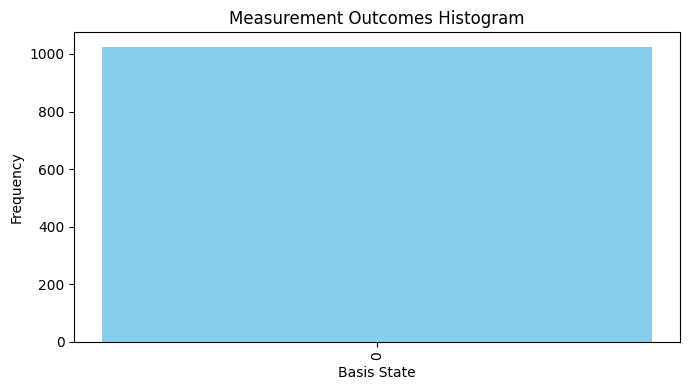

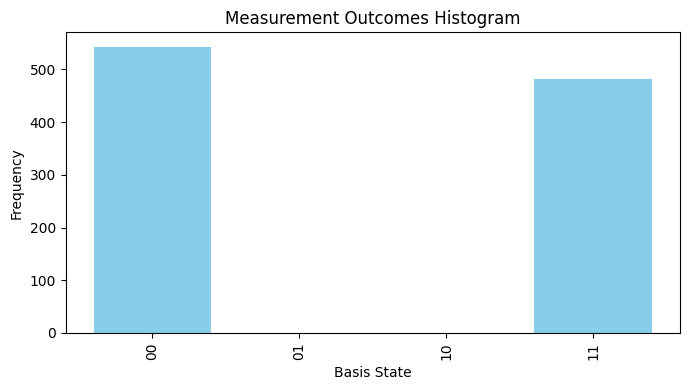

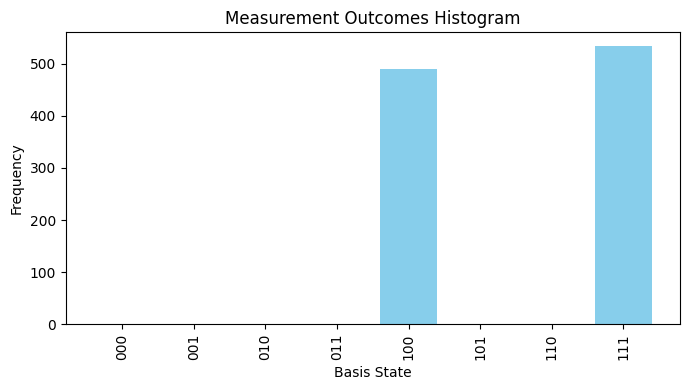

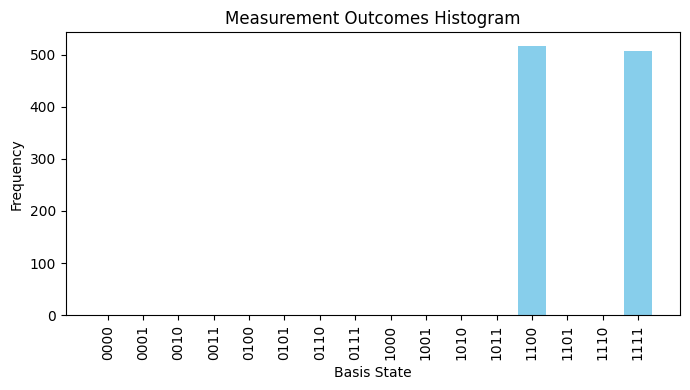

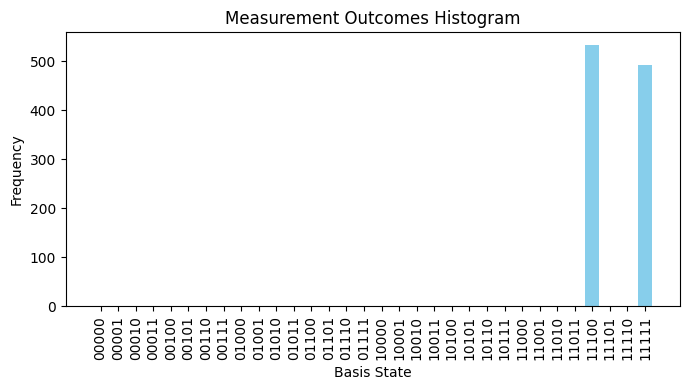

In [16]:
qubit_count=range(1,6)

for x in qubit_count:
    counts = sampling(x)
    
    plt.figure(figsize=(7, 4))
    plt.bar(range(len(counts)), counts, color='skyblue') 
    plt.xlabel("Basis State")
    plt.ylabel("Frequency")
    plt.title("Measurement Outcomes Histogram")
    
    # Generate binary labels for each basis state
    
    x_labels = [f"{i:0{int(np.log2(len(counts)))}b}" for i in range(len(counts))]
    plt.xticks(range(len(counts)), x_labels, rotation=90)
    plt.tight_layout()
    plt.show()


We have successfully sampled from the final state vector.
<br>From the above plots we can easily deduce the quantum state for each system